In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('ridge_regression_default_alpha ( removed missing values ).csv', index_col = 0)

In [4]:
df.head()

,Population_Coeff,Inflation_Coeff,Import_Coeff,Export_Coeff,Test_Score,Export_GDP_Correlation
Country,,,,,,
ABW,2.110374e-06,-5.234120e-05,0.000281,-0.000118,-0.478724,0.289910
AGO,2.288403e-03,-2.036148e-04,0.021916,0.022261,0.955084,0.967478
ALB,-3.211943e-06,-6.821917e-05,0.003194,0.000979,0.979368,0.945574
ARM,-3.036229e-06,-3.880737e-05,0.002687,0.000907,0.943776,0.897635
ATG,7.793166e-08,-1.460810e-08,0.000292,-0.000074,0.371350,-0.088238


In [5]:
df.drop(columns = ['Test_Score', 'Export_GDP_Correlation'], inplace = True)

In [6]:
df

,Population_Coeff,Inflation_Coeff,Import_Coeff,Export_Coeff
Country,,,,
ABW,2.110374e-06,-5.234120e-05,0.000281,-0.000118
AGO,2.288403e-03,-2.036148e-04,0.021916,0.022261
ALB,-3.211943e-06,-6.821917e-05,0.003194,0.000979
ARM,-3.036229e-06,-3.880737e-05,0.002687,0.000907
ATG,7.793166e-08,-1.460810e-08,0.000292,-0.000074
...,...,...,...,...
VUT,3.968272e-07,-6.236072e-06,0.000258,0.000090
WSM,6.811790e-08,-4.009710e-06,0.000293,-0.000026
YEM,-1.726670e-05,1.300573e-03,0.007831,-0.000954


In [7]:
df_ = df.copy()
df_

,Population_Coeff,Inflation_Coeff,Import_Coeff,Export_Coeff
Country,,,,
ABW,2.110374e-06,-5.234120e-05,0.000281,-0.000118
AGO,2.288403e-03,-2.036148e-04,0.021916,0.022261
ALB,-3.211943e-06,-6.821917e-05,0.003194,0.000979
ARM,-3.036229e-06,-3.880737e-05,0.002687,0.000907
ATG,7.793166e-08,-1.460810e-08,0.000292,-0.000074
...,...,...,...,...
VUT,3.968272e-07,-6.236072e-06,0.000258,0.000090
WSM,6.811790e-08,-4.009710e-06,0.000293,-0.000026
YEM,-1.726670e-05,1.300573e-03,0.007831,-0.000954


# Standard Scaler for each row 

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.T).T

In [9]:
df_scaled = pd.DataFrame(df_scaled, index = df.index, columns = df.columns)
df_scaled

,Population_Coeff,Inflation_Coeff,Import_Coeff,Export_Coeff
Country,,,,
ABW,-0.170906,-0.528774,1.662550,-0.962870
AGO,-0.878458,-1.114435,0.980119,1.012775
ALB,-0.779767,-0.829059,1.644194,-0.035367
ARM,-0.806033,-0.838390,1.626994,0.017428
ATG,-0.386761,-0.387420,1.691054,-0.916874
...,...,...,...,...
VUT,-0.798952,-0.861285,1.618049,0.042188
WSM,-0.498410,-0.529369,1.726983,-0.699204
YEM,-0.598467,-0.215124,1.684409,-0.870818


In [10]:
df = df_scaled
df

,Population_Coeff,Inflation_Coeff,Import_Coeff,Export_Coeff
Country,,,,
ABW,-0.170906,-0.528774,1.662550,-0.962870
AGO,-0.878458,-1.114435,0.980119,1.012775
ALB,-0.779767,-0.829059,1.644194,-0.035367
ARM,-0.806033,-0.838390,1.626994,0.017428
ATG,-0.386761,-0.387420,1.691054,-0.916874
...,...,...,...,...
VUT,-0.798952,-0.861285,1.618049,0.042188
WSM,-0.498410,-0.529369,1.726983,-0.699204
YEM,-0.598467,-0.215124,1.684409,-0.870818


# MeanShift Algorithm

In [11]:
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.metrics import silhouette_score

best_quantile = 0
best_score = -1

for quantile in np.linspace(0.1, 1.0, 10):
    bandwidth = estimate_bandwidth(df, quantile=quantile)
    mean_shift = MeanShift(bandwidth=bandwidth)
    mean_shift.fit(df)

    if len(np.unique(mean_shift.labels_)) > 1:
        score = silhouette_score(df, mean_shift.labels_)
        if score > best_score:
            best_score = score
            best_quantile = quantile
    else:
        print(f"Skipping quantile {quantile} due to only 1 cluster.")


print(f"Best Quantile: {best_quantile}")

Skipping quantile 0.7000000000000001 due to only 1 cluster.
Skipping quantile 0.8 due to only 1 cluster.
Skipping quantile 0.9 due to only 1 cluster.
Skipping quantile 1.0 due to only 1 cluster.
Best Quantile: 0.4


In [12]:
bandwidth = estimate_bandwidth(df, quantile = best_quantile)
mean_shift = MeanShift(bandwidth = bandwidth)
mean_shift.fit(df)
labels = mean_shift.labels_
df_['Cluster'] = labels

In [13]:
from sklearn.metrics import silhouette_score
sil_score = silhouette_score(df, df_['Cluster'])
print("Silhouette Score:", ((sil_score + 1) / 2) * 100)

Silhouette Score: 76.73100737857361


In [14]:
df

,Population_Coeff,Inflation_Coeff,Import_Coeff,Export_Coeff
Country,,,,
ABW,-0.170906,-0.528774,1.662550,-0.962870
AGO,-0.878458,-1.114435,0.980119,1.012775
ALB,-0.779767,-0.829059,1.644194,-0.035367
ARM,-0.806033,-0.838390,1.626994,0.017428
ATG,-0.386761,-0.387420,1.691054,-0.916874
...,...,...,...,...
VUT,-0.798952,-0.861285,1.618049,0.042188
WSM,-0.498410,-0.529369,1.726983,-0.699204
YEM,-0.598467,-0.215124,1.684409,-0.870818


In [15]:
df_

,Population_Coeff,Inflation_Coeff,Import_Coeff,Export_Coeff,Cluster
Country,,,,,
ABW,2.110374e-06,-5.234120e-05,0.000281,-0.000118,2
AGO,2.288403e-03,-2.036148e-04,0.021916,0.022261,1
ALB,-3.211943e-06,-6.821917e-05,0.003194,0.000979,0
ARM,-3.036229e-06,-3.880737e-05,0.002687,0.000907,0
ATG,7.793166e-08,-1.460810e-08,0.000292,-0.000074,0
...,...,...,...,...,...
VUT,3.968272e-07,-6.236072e-06,0.000258,0.000090,0
WSM,6.811790e-08,-4.009710e-06,0.000293,-0.000026,0
YEM,-1.726670e-05,1.300573e-03,0.007831,-0.000954,0


In [16]:
df_.Cluster.value_counts()

Cluster
0    141
1     16
2      6
Name: count, dtype: int64

In [17]:
df_.to_csv('clustered_data.csv')

# Cluster Dimentionality reduction of PCA

In [18]:
from sklearn.decomposition import PCA
pca = PCA(0.95)
df_pca = pca.fit_transform(df)

In [19]:
df_pca = pd.DataFrame(df_pca, columns = ['Component 1', 'Component 2', 'Component 3'], index = df.index)
df_pca

,Component 1,Component 2,Component 3
Country,,,
ABW,-1.179091,0.415042,0.154934
AGO,1.066612,0.046432,-0.027981
ALB,-0.192395,-0.160456,0.025658
ARM,-0.132441,-0.176545,0.028269
ATG,-1.132439,0.227025,0.333752
...,...,...,...
VUT,-0.104631,-0.168828,0.007424
WSM,-0.911729,0.089962,0.216337
YEM,-1.077099,0.064578,0.551052


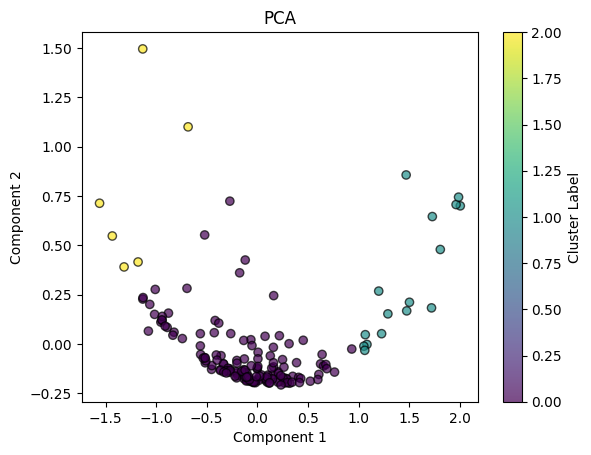

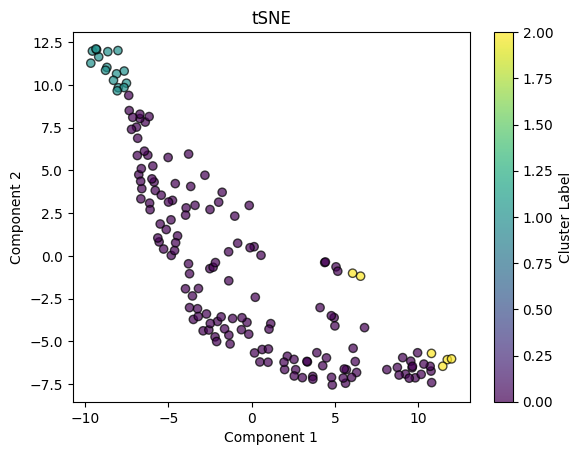

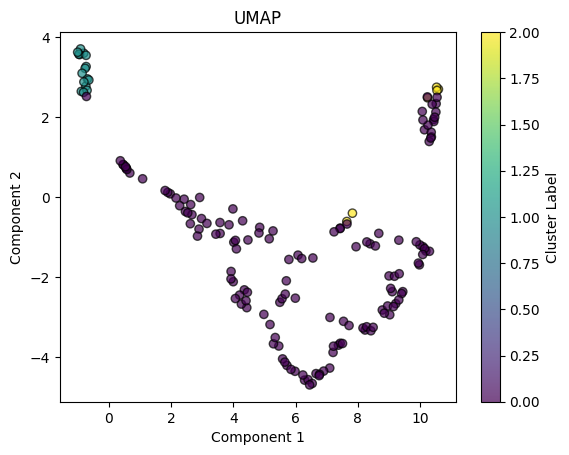

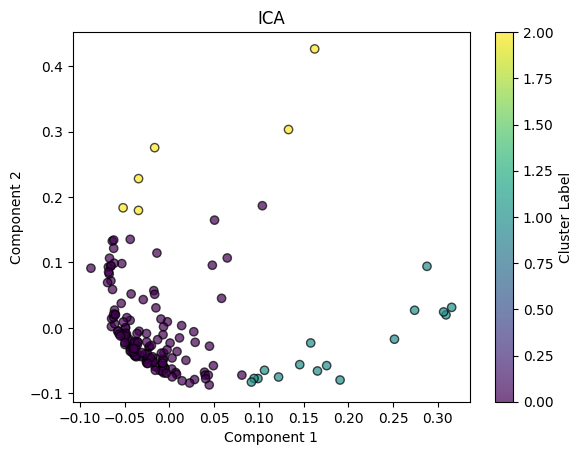

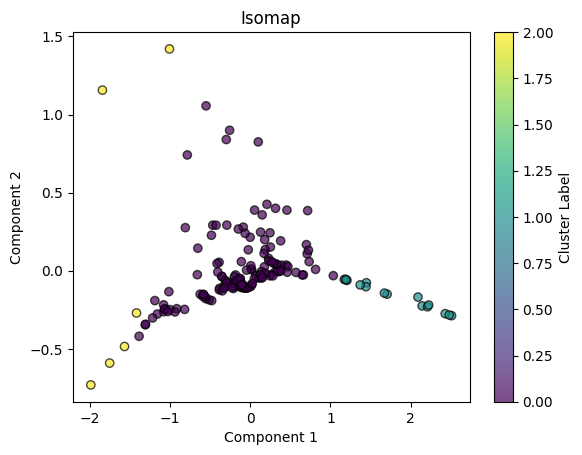

In [20]:
from sklearn.decomposition import *
from sklearn.manifold import TSNE, Isomap
from umap import UMAP

def visualize_dim_red(name, alg, data, clusters):
    al = alg(n_components=2)
    tr = al.fit_transform(data)

    plt.scatter(tr[:, 0], tr[:, 1], c=clusters, cmap='viridis', alpha=0.7, edgecolors='k')

    plt.title(name)
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.colorbar(label="Cluster Label")
    plt.show()

algs = {'PCA': PCA, 'tSNE': TSNE, 'UMAP': UMAP, 'ICA': FastICA, 'Isomap': Isomap}

 
clusters = df_['Cluster']


df_features = df


for name, alg in algs.items():
    visualize_dim_red(name, alg, df_features, clusters)


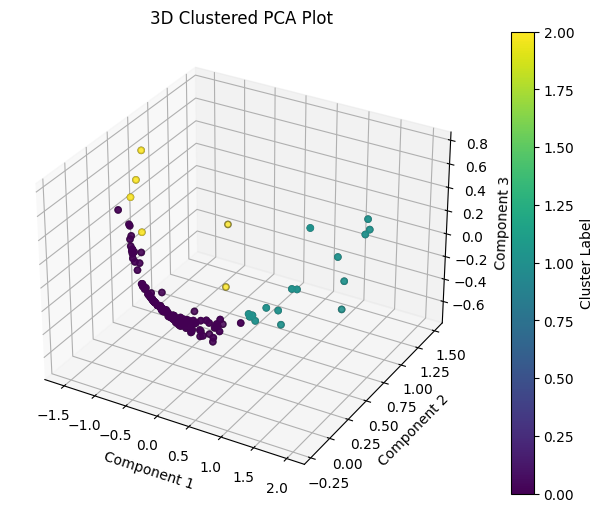

In [21]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')


ax.scatter(df_pca.iloc[:, 0], df_pca.iloc[:, 1], df_pca.iloc[:, 2], 
           c=df_['Cluster'], cmap='viridis', alpha=0.7, edgecolors='k')


ax.set_title("3D Clustered PCA Plot")
ax.set_xlabel("Component 1")
ax.set_ylabel("Component 2")
ax.set_zlabel("Component 3")

cbar = plt.colorbar(ax.scatter(df_pca.iloc[:, 0], df_pca.iloc[:, 1], df_pca.iloc[:, 2], 
                               c=df_['Cluster'], cmap='viridis'))
cbar.set_label("Cluster Label")
plt.savefig("3D_PCA_Cluster.png", dpi=300, bbox_inches='tight')
plt.show()


# Dimentionality reduction of UMAP

In [22]:
from umap import UMAP
umap = UMAP(n_components = 3, random_state = 42)
df_umap = umap.fit_transform(df)

In [23]:
df_umap = pd.DataFrame(df_umap, columns = ['Component 1', 'Component 2', 'Component 3'], index = df.index)

In [24]:
df_umap

,Component 1,Component 2,Component 3
Country,,,
ABW,16.259703,2.890769,2.868043
AGO,-4.360192,4.968551,2.895726
ALB,7.903989,-1.272135,1.302481
ARM,7.346052,-2.251781,2.424435
ATG,16.356947,3.117596,2.936482
...,...,...,...
VUT,7.171808,-2.331921,2.275906
WSM,15.855188,3.487193,3.218035
YEM,16.342476,3.220269,3.117277


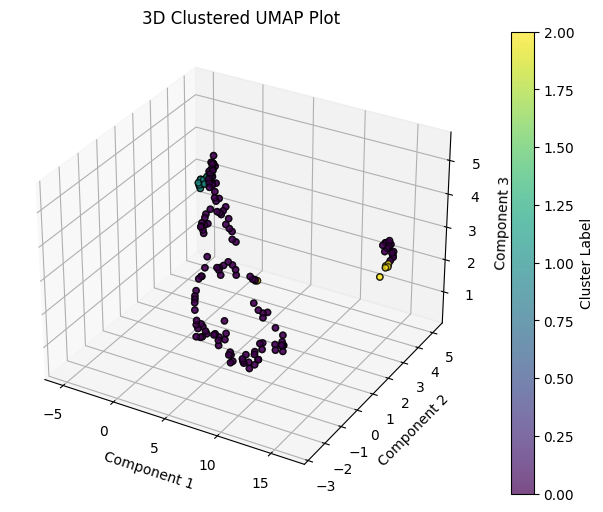

In [25]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(df_umap.iloc[:,0], df_umap.iloc[:,1], df_umap.iloc[:,2], c = df_['Cluster'], cmap = 'viridis', alpha = 0.7, edgecolors = 'k')

cbar = plt.colorbar(ax.scatter(df_umap.iloc[:,0], df_umap.iloc[:,1], df_umap.iloc[:,2], c = df_['Cluster'], cmap = 'viridis', alpha = 0.7, edgecolors = 'k'))
cbar.set_label('Cluster Label')


ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
ax.set_title('3D Clustered UMAP Plot')
plt.savefig("3D_UMAP_Cluster.png", dpi=300, bbox_inches='tight')
plt.show()

# Dimentionality reduction of Isomap

In [26]:
from sklearn.manifold import Isomap
isomap = Isomap(n_components = 3)
df_isomap = isomap.fit_transform(df)

In [27]:
df_isomap = pd.DataFrame(df_isomap, columns = ['component 1', 'coponent 2' , 'component 3'], index = df.index)
df_isomap

,component 1,coponent 2,component 3
Country,,,
ABW,-1.415913,-0.270483,0.198890
AGO,1.185426,-0.056193,0.084145
ALB,-0.195650,-0.100583,-0.056458
ARM,-0.132292,-0.101163,-0.050715
ATG,-1.306816,-0.346594,0.148054
...,...,...,...
VUT,-0.107191,-0.091207,-0.081931
WSM,-1.025008,-0.260639,0.102859
YEM,-1.383401,-0.419652,-0.014161


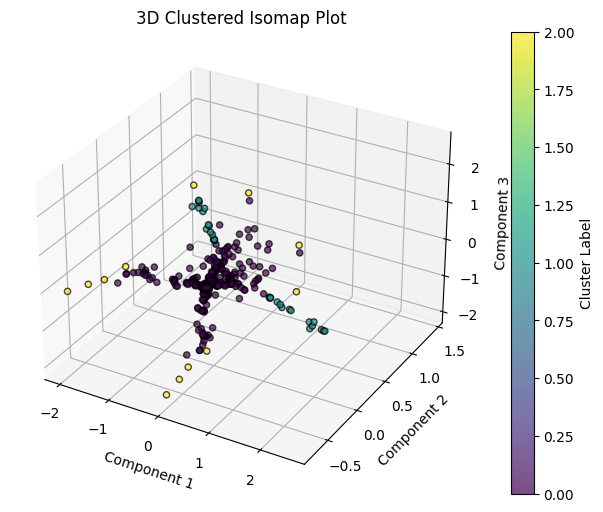

In [28]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(df_isomap.iloc[:,2], df_isomap.iloc[:,1], df_isomap.iloc[:,0], c = df_['Cluster'], cmap = 'viridis', alpha = 0.7, edgecolors = 'k')

cbar = plt.colorbar(ax.scatter(df_isomap.iloc[:,0], df_isomap.iloc[:,1], df_isomap.iloc[:,2], c = df_['Cluster'], cmap = 'viridis', alpha = 0.7, edgecolors = 'k'))
cbar.set_label('Cluster Label')


ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
ax.set_title('3D Clustered Isomap Plot')
plt.savefig("3D_Isomap_Cluster.png", dpi=300, bbox_inches='tight')
plt.show()